## Importing Packages and dataset

In [240]:
import numpy as np

import pandas as pd

from scipy.stats import norm

In [241]:
data = pd.read_excel('spx_returns_weekly.xlsx', sheet_name=2)
data = data[['date', 'AAPL', 'META', 'NVDA', 'TSLA']]
data_without_date = data.select_dtypes(include=np.number)

## Calculating VaR, CVaR, and Volatlity

In [242]:
annual_volatlity = data.select_dtypes(include=np.number).std()*np.sqrt(52)
weekly_var05 = np.quantile(data[['AAPL', 'META', 'NVDA', 'TSLA']], 0.05, axis=0)
CVaR = data_without_date[data_without_date < weekly_var05].mean()

summary = pd.DataFrame({'CVaR': CVaR, 'Volatility': annual_volatlity, 'Weekly VaR 0.05': weekly_var05})
summary.round(4)

,CVaR,Volatility,Weekly VaR 0.05
AAPL,-0.0831,0.2766,-0.0564
META,-0.1032,0.3513,-0.0700
NVDA,-0.1165,0.4633,-0.0869
TSLA,-0.1478,0.5864,-0.1174


In [243]:
data['equal_weight'] = (data['AAPL'] + data['META'] + data['NVDA'] + data['TSLA'])/4
ew_volatlity = data['equal_weight'].std()*np.sqrt(52)
ew_var05 = np.quantile(data['equal_weight'], 0.05)
ew_CVaR = data['equal_weight'][data['equal_weight'] < ew_var05].mean()

ew_summary = pd.DataFrame({'CVaR': [ew_CVaR], 'Volatility': [ew_volatlity], 'Weekly VaR 0.05': [ew_var05]})
ew_summary = ew_summary.round(4)
ew_summary

,CVaR,Volatility,Weekly VaR 0.05
0,-0.085,0.3155,-0.0619


In [244]:
data['port_ex_TSLA'] = (data['AAPL'] + data['META'] + data['NVDA'])/3
port_ex_TSLA_volatlity = data['port_ex_TSLA'].std()*np.sqrt(52)
port_ex_TSLA_var05 = np.quantile(data['port_ex_TSLA'], 0.05)
port_ex_TSLA_CVaR = data['port_ex_TSLA'][data['port_ex_TSLA'] < port_ex_TSLA_var05].mean()

port_ex_TSLA_summary = pd.DataFrame({'CVaR': [port_ex_TSLA_CVaR], 'Volatility': [port_ex_TSLA_volatlity], 'Weekly VaR 0.05': [port_ex_TSLA_var05]})
port_ex_TSLA_summary.round(4)


,CVaR,Volatility,Weekly VaR 0.05
0,-0.0807,0.2912,-0.0566


## Rolling Vol Forecast

<Axes: >

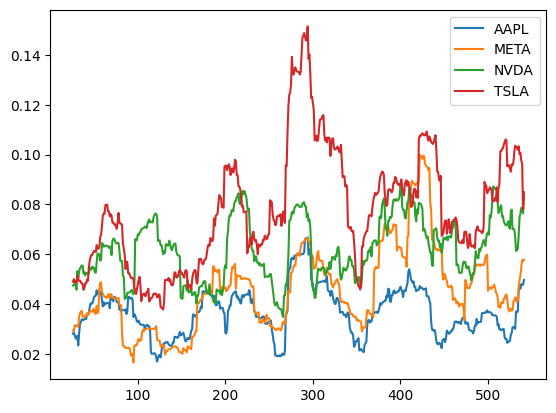

In [245]:
data_without_date.rolling(26).std().shift(1).plot()

In [246]:
forecast_vol = (data_without_date.rolling(26).std()).iloc[-1]

In [247]:
# VaR using normal distribution
norm.ppf(0.05, loc=0, scale=forecast_vol).round(3)

array([-0.085, -0.095, -0.136, -0.137])

In [248]:
# Calculate normal CVaR at 5% for each asset using forecast_vol
alpha = 0.05
normal_cvar = (norm.pdf(norm.ppf(alpha)) / alpha) * forecast_vol * -1
normal_cvar.round(3)


AAPL   -0.106
META   -0.120
NVDA   -0.171
TSLA   -0.171
Name: 541, dtype: float64